# 逻辑回归案例练习

## 1. 引用

In [2]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Automatically created module for IPython interactive environment


## 2.数据准备

In [13]:
xmin=-5 
xmax = 5
n_samples = 300
np.random.seed(0)

In [14]:
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]

In [15]:
X[:5]

array([[ 6.66425133],
       [ 2.09806804],
       [ 3.87950272],
       [ 8.75951934],
       [ 7.67014689]])

In [16]:
X.shape

(300, 1)

In [17]:
y[:10]

array([ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.])

## 2 模型创建与训练

In [19]:
clf = linear_model.LogisticRegression(C=1e5)

In [20]:
%%time
clf.fit(X, y)

Wall time: 41 ms


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
clf.coef_

array([[ 6.46362934]])

In [38]:
clf.intercept_

array([-1.43608903])

### 2.1 sigmoid函数

In [26]:
def model(x):
    return 1 / (1 + np.exp(-x))

## 3 模型数据:测试

In [22]:
%%time
X_test = np.linspace(-5, 10, 300)

Wall time: 0 ns


In [23]:
X_test[:5]

array([-5.        , -4.94983278, -4.89966555, -4.84949833, -4.7993311 ])

In [30]:
loss01 = model(X_test * clf.coef_ + clf.intercept_)
loss01.shape

(1, 300)

In [33]:
loss02=loss01.ravel()

In [34]:
loss02.shape

(300,)

In [32]:
loss02[:5]

array([  2.19140009e-15,   3.03072841e-15,   4.19152795e-15,
         5.79692540e-15,   8.01720627e-15])

In [35]:
X.ravel()[:5]

array([ 6.66425133,  2.09806804,  3.87950272,  8.75951934,  7.67014689])

## 4 新模型

In [11]:
ols = linear_model.LinearRegression()
ols.fit(X, y)
ols.coef_,ols.intercept_

(array([ 0.12905048]), 0.37078983017505796)

## 3 画图

In [12]:
plt.figure(1, figsize=(14, 8))
plt.clf()

In [13]:
plt.scatter(X.ravel(), y, color='black', zorder=20)

In [14]:
plt.plot(X_test, loss02, color='red', linewidth=3)

In [15]:
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=2)

In [16]:
plt.axhline(0.5, color='0.5')

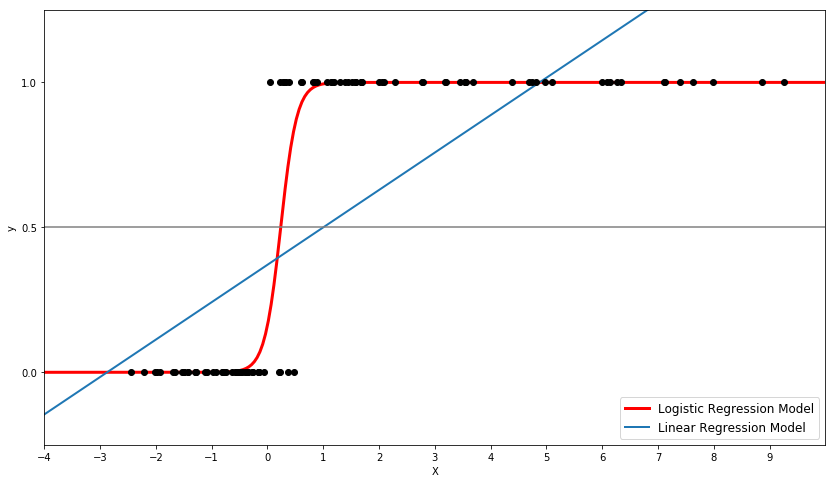

In [17]:
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='larger')
plt.show()